# County Data

In [5]:
import pandas as pd

# Reading Data
county_data = pd.read_csv('data/Covid19CountyStatisticsHPSCIreland.csv', index_col="OBJECTID", parse_dates = True)

# Removing not needed data
del county_data["ORIGID"]
del county_data["PopulationCensus16"]
del county_data["IGEasting"]
del county_data["IGNorthing"]
del county_data["Lat"]
del county_data["Long"]
del county_data["UGI"]
del county_data["ConfirmedCovidDeaths"]
del county_data["ConfirmedCovidRecovered"]
del county_data["Shape__Area"]
del county_data["Shape__Length"]

county_data.head()

,CountyName,TimeStamp,ConfirmedCovidCases,PopulationProportionCovidCases
OBJECTID,,,,
1,Carlow,2020/02/27 00:00:00+00,0,NaN
2,Cavan,2020/02/27 00:00:00+00,0,NaN
3,Clare,2020/02/27 00:00:00+00,0,NaN
4,Cork,2020/02/27 00:00:00+00,0,NaN
5,Donegal,2020/02/27 00:00:00+00,0,NaN


In [6]:
# Extracting data for Dublin, Mayo, Limerick/Clare
dublin = mayo = limerick = clare = leitrim = tipp = pd.DataFrame();
for row in range(len(county_data)):
    # Dublin Airport (Dublin)
    if (county_data.iloc[row]['CountyName'] == 'Dublin'):
        dublin = dublin.append(county_data.iloc[row])

    # Knock Airport (Mayo)
    if (county_data.iloc[row]['CountyName'] == 'Mayo'):
        mayo = mayo.append(county_data.iloc[row])

    # Shannon Airport (Limerick / Clare)
    if (county_data.iloc[row]['CountyName'] == 'Limerick'):
        limerick = limerick.append(county_data.iloc[row])
    
    if (county_data.iloc[row]['CountyName'] == 'Clare'):
        clare = clare.append(county_data.iloc[row])

    # Non Airport Counties
    if (county_data.iloc[row]['CountyName'] == 'Leitrim'):
        leitrim = leitrim.append(county_data.iloc[row])
    
    if (county_data.iloc[row]['CountyName'] == 'Tipperary'):
        tipp = tipp.append(county_data.iloc[row])

In [7]:
# Formatting Indexes
dublin.set_index("TimeStamp", inplace = True)
dublin.index = pd.to_datetime(dublin.index).date

mayo.set_index("TimeStamp", inplace = True)
mayo.index = pd.to_datetime(mayo.index).date

limerick.set_index("TimeStamp", inplace = True)
limerick.index = pd.to_datetime(limerick.index).date

clare.set_index("TimeStamp", inplace = True)
clare.index = pd.to_datetime(clare.index).date

leitrim.set_index("TimeStamp", inplace = True)
leitrim.index = pd.to_datetime(leitrim.index).date

tipp.set_index("TimeStamp", inplace = True)
tipp.index = pd.to_datetime(tipp.index).date

In [8]:
# Saving to CSVs
dublin.to_csv('./data/cleaned/county_data/dublin.csv', sep=',')
mayo.to_csv('./data/cleaned/county_data/mayo.csv', sep=',')
limerick.to_csv('./data/cleaned/county_data/limerick.csv', sep=',')
clare.to_csv('./data/cleaned/county_data/clare.csv', sep=',')
leitrim.to_csv('./data/cleaned/county_data/leitrim.csv', sep=',')
tipp.to_csv('./data/cleaned/county_data/tipp.csv', sep=',')

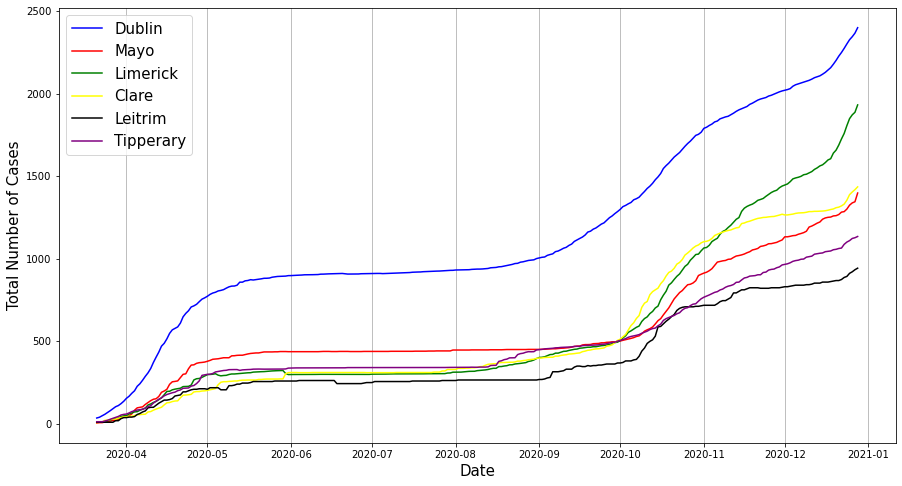

In [19]:
# Graph data, set country to respective colour
graph = dublin['PopulationProportionCovidCases'].plot(color='blue', figsize=(15,8), label='Dublin')
graph = mayo['PopulationProportionCovidCases'].plot(color='red', figsize=(15,8), label='Mayo')
graph = limerick['PopulationProportionCovidCases'].plot(color='green', figsize=(15,8), label='Limerick')
graph = clare['PopulationProportionCovidCases'].plot(color='yellow', figsize=(15,8), label='Clare')
graph = leitrim['PopulationProportionCovidCases'].plot(color='black', figsize=(15,8), label='Leitrim')
graph = tipp['PopulationProportionCovidCases'].plot(color='purple', figsize=(15,8), label='Tipperary')

# Setting graph styling
graph.set_xlabel("Date", fontsize=15)
graph.set_ylabel("Total Number of Cases", fontsize=15)
graph.legend(fontsize=15)
graph.xaxis.grid()